In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

## Constants

In [2]:
PATH = "C:/Users/Mesh/Desktop/PythonFinance/Python4Finance/BigSectorStocks/"

# Start end date defaults
S_DATE = "2018-02-01"
E_DATE = "2023-12-06"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

## Get Stock File Names in a List

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 3263 total stocks
tickers.sort()
len(tickers)

8170

## Function that Returns a Dataframe from a CSV

In [4]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError as ex:
        print(ex)
    else:
        return df

## Merge Multiple Stocks in One Dataframe by Column Name

In [5]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_stock_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        # if not df.index.is_unique:
        #     # Delete duplicates 
        #     df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. 

$w_1r_1 + w_2r_2 = r_p$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

## Plotting an Efficient Frontier

## Stock Portfolio

In [6]:
# 1ST LIST port_list = ['CALX', 'NOVT', 'BLDR', 'DXCM', 'RGEN', 'PFE', 'LLY',
# 'AMD', 'NVDA', 'NFLX', 'DAR', 'COST', 'BJ', 'WMT', 'BOOT', 'WING',
# 'LULU', 'NEE', 'AWK', 'MSCI', 'KKR', 'LPX', 'SHW', 'NXRT', 'NSA',
# 'CBRE', 'AES']

# 2ND LIST port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'LULU', 'NEE', 'MSCI', 'KKR', 'SHW', 'NSA',
# 'CBRE']
# port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'MSCI', 'CBRE']

## port list from analysis done in 17.12.22
port_list = [
     "SGML", "PWR", "SBR", "SUN", "EQNR", "VICI", "IRM", "RFP", "GPK", "KNSL", "LPLA", "AJG", "MUSA", "LNG", "CWST", "TRMD", "DDS", "DAR", "KDP", "GIS", "HSY", "EXTR", "PTNR", "ENPH", "LSCC", "RENN", "NSSC", "DXCM", "LLY", "CYTK"
] 
num_stocks = len(port_list)
num_stocks

30

## Merge All Data by Closing Price

In [7]:
mult_df = merge_df_by_column_name('Close',  S_DATE, 
                                  E_DATE, *port_list)
mult_df

,SGML,PWR,SBR,SUN,EQNR,VICI,IRM,RFP,GPK,KNSL,...,HSY,EXTR,PTNR,ENPH,LSCC,RENN,NSSC,DXCM,LLY,CYTK
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,1.483000,33.164864,30.958241,15.982963,21.774368,16.648785,26.358269,8.285937,13.396818,54.323330,...,84.309334,8.370000,3.55,7.030000,6.350000,7.260000,8.250000,24.530001,79.752731,9.100000
2018-07-05,1.483000,33.263416,31.072151,15.925748,22.377148,16.752537,26.447214,8.245909,13.451876,55.547630,...,86.481361,8.310000,3.74,7.010000,6.400000,7.080000,8.400000,24.379999,79.798828,9.150000
2018-07-19,1.532000,32.918465,30.575428,16.415281,21.336737,16.576952,26.254496,9.286654,13.690449,57.127369,...,83.818573,8.890000,3.90,7.020000,6.650000,7.200000,8.375000,25.635000,82.444656,8.900000
2018-07-20,1.532000,32.810059,30.878815,16.402567,21.444078,16.545027,25.906113,8.806311,13.607863,57.127369,...,83.536850,8.840000,3.87,6.760000,6.690000,7.110000,8.375000,25.557501,81.559639,8.800000
2018-07-23,1.489000,32.346821,31.451910,16.714088,21.369762,16.441269,25.802345,8.686224,13.644567,57.561794,...,82.737106,8.850000,4.08,6.720000,6.900000,7.020000,8.425000,26.082500,81.937614,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,31.684999,150.259995,84.539062,43.799999,36.189999,34.080002,54.218914,21.000000,22.180046,284.170013,...,239.289993,20.290001,6.85,320.859985,71.970001,32.730000,26.350000,116.779999,367.250000,38.330002
2022-12-13,31.700001,152.539993,82.762001,44.189999,37.869999,34.389999,54.921001,21.020000,22.190001,279.869995,...,236.330002,20.440001,6.82,325.989990,74.139999,32.660000,27.020000,119.559998,358.660004,38.330002
2022-12-14,31.700001,152.089996,82.250000,43.790001,37.090000,34.189999,54.959999,21.049999,22.309999,273.640015,...,236.009995,19.969999,6.82,332.799988,73.099998,32.590000,27.270000,121.489998,363.500000,41.410000


## Plot Price of Investments over Total Dataset

In [8]:
# Plot out prices for each stock since beginning of 2017
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1200, width=1800, 
                  showlegend=True)
fig.show()

## Cumulative Return for all Stocks

In [9]:
mult_cum_df = merge_df_by_column_name('cum_return',  S_DATE, 
                                  E_DATE, *port_list)
mult_cum_df

,SGML,PWR,SBR,SUN,EQNR,VICI,IRM,RFP,GPK,KNSL,...,HSY,EXTR,PTNR,ENPH,LSCC,RENN,NSSC,DXCM,LLY,CYTK
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,NaN,0.876759,1.081192,0.925983,1.322276,1.060288,0.970634,0.995192,0.955004,1.227084,...,0.823262,0.678282,0.591667,2.746094,1.081772,2.581324,1.918605,1.681577,1.019457,1.064328
2018-07-05,1.000000,0.879364,1.085170,0.922668,1.358881,1.066895,0.973910,0.990385,0.958929,1.254739,...,0.844471,0.673420,0.623333,2.738281,1.090290,2.517324,1.953488,1.671294,1.020046,1.070175
2018-07-19,1.033041,0.870245,1.067822,0.951030,1.295700,1.055713,0.966813,1.115385,0.975935,1.290423,...,0.818470,0.720421,0.650000,2.742188,1.132879,2.559990,1.947674,1.757327,1.053867,1.040936
2018-07-20,1.033041,0.867379,1.078418,0.950293,1.302219,1.053680,0.953984,1.057692,0.970048,1.290423,...,0.815719,0.716370,0.645000,2.640625,1.139693,2.527991,1.947674,1.752014,1.042554,1.029240
2018-07-23,1.004046,0.855133,1.098433,0.968341,1.297706,1.047072,0.950163,1.043269,0.972665,1.300236,...,0.807909,0.717180,0.680000,2.625000,1.175469,2.495991,1.959302,1.788004,1.047385,0.994152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,21.365474,3.972329,2.952459,2.537581,2.197684,2.170405,1.996593,2.522230,1.581124,6.418982,...,2.336613,1.644246,1.141667,125.335935,12.260648,11.637290,6.127907,8.005484,4.694452,4.483041
2022-12-13,21.375590,4.032604,2.890397,2.560176,2.299704,2.190147,2.022447,2.524632,1.581833,6.321851,...,2.307709,1.656402,1.136667,127.339843,12.630324,11.612401,6.283721,8.196058,4.584649,4.483041
2022-12-14,21.375590,4.020708,2.872516,2.537002,2.252337,2.177410,2.023883,2.528235,1.590388,6.181125,...,2.304585,1.618314,1.136667,129.999998,12.453152,11.587512,6.341860,8.328363,4.646517,4.843275


In [10]:
# Plot out cumulative returns for each stock since beginning of 2017
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=1200, width=1800, 
                  showlegend=True)
fig.show()

## Mean Returns

In [11]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

SGML    1.054902
PWR     0.514277
SBR     0.327873
SUN     0.346608
EQNR    0.177589
VICI    0.244064
IRM     0.236161
RFP     0.328185
GPK     0.163465
KNSL    0.571872
LPLA    0.420008
AJG     0.392949
MUSA    0.475620
LNG     0.315807
CWST    0.402375
TRMD    0.536685
DDS     0.455100
DAR     0.397636
KDP     0.242277
GIS     0.298843
HSY     0.360284
EXTR    0.281213
PTNR    0.243018
ENPH    1.323205
LSCC    0.842070
RENN    0.524953
NSSC    0.416183
DXCM    0.541892
LLY     0.529591
CYTK    0.551554
dtype: float64

## Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. 

$w_1r_1 + w_2r_2 = r_p$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

## Correlation

In [12]:
# We want great performing stocks that go up when others go down to smooth the returns over the year
returns.corr()

,SGML,PWR,SBR,SUN,EQNR,VICI,IRM,RFP,GPK,KNSL,...,HSY,EXTR,PTNR,ENPH,LSCC,RENN,NSSC,DXCM,LLY,CYTK
SGML,1.000000,0.164673,0.162073,0.152689,0.143389,0.137797,0.160789,0.048110,0.210423,0.102069,...,0.147112,0.179107,0.116945,0.155709,0.162759,0.041053,0.091725,0.195186,0.074913,0.154589
PWR,0.164673,1.000000,0.457507,0.531050,0.556177,0.609310,0.478330,0.383257,0.497146,0.407976,...,0.331670,0.509801,0.273731,0.329009,0.405258,0.262495,0.317824,0.360540,0.263481,0.280283
SBR,0.162073,0.457507,1.000000,0.466967,0.617428,0.399765,0.432413,0.253238,0.374673,0.227010,...,0.198985,0.314892,0.215935,0.167527,0.239781,0.260705,0.169967,0.109836,0.115132,0.140589
SUN,0.152689,0.531050,0.466967,1.000000,0.513638,0.725355,0.313100,0.366136,0.493299,0.377171,...,0.452120,0.492901,0.312715,0.425011,0.374784,0.200805,0.232284,0.436871,0.269395,0.352160
EQNR,0.143389,0.556177,0.617428,0.513638,1.000000,0.496776,0.446413,0.347655,0.422220,0.283063,...,0.158998,0.415954,0.336593,0.077436,0.271107,0.350128,0.225941,0.187695,0.163878,0.220054
VICI,0.137797,0.609310,0.399765,0.725355,0.496776,1.000000,0.496923,0.303530,0.518201,0.441051,...,0.554907,0.557474,0.319028,0.403794,0.376172,0.344502,0.186453,0.440634,0.263125,0.395273
IRM,0.160789,0.478330,0.432413,0.313100,0.446413,0.496923,1.000000,0.183105,0.426469,0.345774,...,0.282430,0.310694,0.264468,0.077884,0.275039,0.273841,0.148281,0.189342,0.267193,0.219573
RFP,0.048110,0.383257,0.253238,0.366136,0.347655,0.303530,0.183105,1.000000,0.322018,0.126565,...,0.100609,0.364706,0.186531,0.174523,0.220808,0.145099,0.287113,0.216549,0.149044,0.112009
GPK,0.210423,0.497146,0.374673,0.493299,0.422220,0.518201,0.426469,0.322018,1.000000,0.404549,...,0.424525,0.416693,0.233559,0.274053,0.433785,0.172488,0.325142,0.385168,0.225389,0.358473
KNSL,0.102069,0.407976,0.227010,0.377171,0.283063,0.441051,0.345774,0.126565,0.404549,1.000000,...,0.461568,0.373989,0.253397,0.425408,0.403984,0.211876,0.279070,0.429378,0.154351,0.331645


## Generate Random Weights Equal to 1

In [13]:
# Generate 11 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.05919115 0.01008548 0.00108745 0.01848218 0.02403983 0.00407137
 0.05932444 0.01226312 0.0194887  0.03891968 0.02983434 0.01407639
 0.02690687 0.04419578 0.04955695 0.0279876  0.05844065 0.02419148
 0.06549687 0.04181436 0.049254   0.03591449 0.0214396  0.04265685
 0.01676823 0.06431866 0.03219137 0.06389893 0.00216166 0.04194154]
Total Weight : 1.0


## Calculating Return of Portfolio using a Random Weighting

In [14]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.47717332986374156

## Calculating Volatility

In [15]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.32592540296232364

## Analyzing Returns & Risks of 15000 Combinations

In [16]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(15000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.46926397, 0.44911356, 0.45873247, ..., 0.47209559, 0.43656614,
        0.43465373]),
 array([0.31323128, 0.33540539, 0.3116687 , ..., 0.33894811, 0.31624015,
        0.31514876]),
 array([1.4582323 , 1.3017488 , 1.43175259, ..., 1.35594677, 1.34096236,
        1.33953798]),
 array([[0.04834762, 0.00730523, 0.00574638, ..., 0.02357182, 0.05496273,
         0.01051637],
        [0.00108429, 0.02930988, 0.01515109, ..., 0.03352395, 0.02872327,
         0.04344249],
        [0.05775316, 0.0219298 , 0.0246869 , ..., 0.03784609, 0.04546873,
         0.02921814],
        ...,
        [0.04924378, 0.06717223, 0.05251606, ..., 0.01217676, 0.02540743,
         0.06778538],
        [0.03162702, 0.03363661, 0.04415433, ..., 0.06287788, 0.03941663,
         0.05658397],
        [0.01642453, 0.03006588, 0.04615016, ..., 0.02813575, 0.03236082,
         0.06783325]]))

## Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

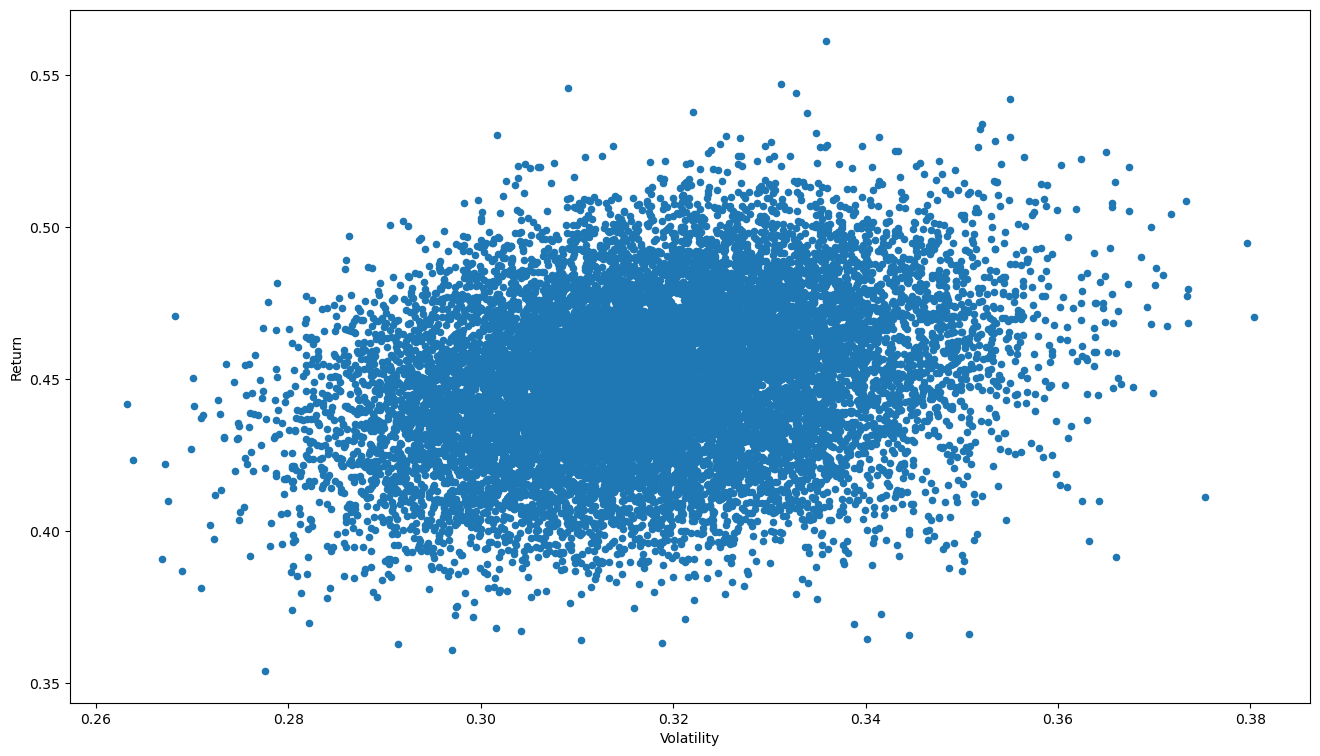

In [17]:
#%%
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk. 

*Sharpe Ratio* = $\frac{r_i - r_f}{\sigma_i}$

$r_f = $ Risk Free Rate

$r_i = $ Rate of Return of the stock

$\sigma_i = $ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [18]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])


Stock : SGML : 6.33
Stock : PWR : 4.49
Stock : SBR : 6.26
Stock : SUN : 0.78
Stock : EQNR : 3.45
Stock : VICI : 0.26
Stock : IRM : 2.20
Stock : RFP : 1.09
Stock : GPK : 3.41
Stock : KNSL : 2.21
Stock : LPLA : 2.43
Stock : AJG : 1.57
Stock : MUSA : 5.78
Stock : LNG : 1.94
Stock : CWST : 6.00
Stock : TRMD : 0.51
Stock : DDS : 6.95
Stock : DAR : 0.23
Stock : KDP : 2.61
Stock : GIS : 2.52
Stock : HSY : 2.85
Stock : EXTR : 0.13
Stock : PTNR : 0.91
Stock : ENPH : 7.07
Stock : LSCC : 6.92
Stock : RENN : 2.04
Stock : NSSC : 2.00
Stock : DXCM : 5.73
Stock : LLY : 7.25
Stock : CYTK : 4.07

Volatility : 0.3091031384401202
Return : 0.5457519227455542


Find percentage closest to 1 and use it as the basis for calculating all other shares
Since CBRE is .6 : CALX is 7.25 : Multiply cost of CBRE (105.64) by 7 and then divide 
that by the cost of CALX to get the shares to buy for GNRC

105.64 * 7 = 739.48 / 64.28 = 25.49 (11 Shares) * 64.28 = 707.08

In situations in which prices don't work either discard stock or force 1 share

In [19]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

## Get Portfolio Weighting

In [20]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

## Returns the Value of Portfolio by Date

In [21]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

## Approximate Portfolio Weighting Based on Request

In [22]:
## port list from analysis done in 17.12.22
port_list = [
     "SGML", "PWR", "SBR", "SUN", "EQNR", "VICI", "IRM", "RFP", "GPK", "KNSL", "LPLA", "AJG", "MUSA", "LNG", "CWST", "TRMD", "DDS", "DAR", "KDP", "GIS", "HSY", "EXTR", "PTNR", "ENPH", "LSCC", "RENN", "NSSC", "DXCM", "LLY", "CYTK"
]
port_wts = [6, 4, 6, 1, 3, 0, 2, 1, 3, 2, 2, 2, 6, 2, 6, 1, 7, 0, 3, 2, 3, 0, 1, 7, 7, 2, 2, 6, 7, 4]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close',  '2022-01-07', 
                                  '2022-01-07', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(105.64, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares : [56, 3, 15, 2, 11, 1, 4, 6, 16, 1, 1, 1, 3, 1, 7, 14, 3, 1, 8, 3, 1, 1, 13, 5, 10, 11, 9, 5, 2, 12]
Share Cost : [623.2800064086914, 319.53879547119146, 626.3460159301758, 78.21916961669922, 291.4306163787842, 27.50883102416992, 178.42861938476562, 90.78000068664551, 310.6988525390625, 222.7743530273437, 176.54998779296875, 163.42396545410156, 581.7599029541016, 107.4753646850586, 562.1000213623047, 102.43859958648682, 666.8806915283203, 65.5, 293.7496337890625, 201.3493881225586, 192.363525390625, 14.25, 104.26000595092773, 725.6500244140625, 688.0999755859375, 201.19001007080078, 201.87000274658203, 589.3624877929689, 512.0022583007812, 421.8000183105469]
Total Investment : 9341.081124305725
Stock Weights : [0.06672461122159633, 0.03420790283468833, 0.06705283977251925, 0.008373674157820019, 0.031198810127071316, 0.0029449301058515867, 0.019101495534653897, 0.009718361234486411, 0.033261551677419475, 0.023848883235547468, 0.01890038052807199, 0.017495187471273356, 0.06227971

[]